# Exploring ECHO Data in Your Area
This workbook is a way to quickly view data from EPA's Enforcement and Compliance History Online portal that is relevant just to your area.
It is designed to work with the [ECHO Exporter](https://echo.epa.gov/tools/data-downloads#exporter) file.

## How to run this notebook:
1. In the cell below, replace the congressional district with your own congressional district number (keep it in quotation marks. For example: `my_cd = "17"` ([here's a congressional district lookup tool](https://www.house.gov/representatives/find-your-representative)) and state (the two-letter abbreviation, in all caps).
1. Go to the Runtime menu and click "Run all": ![Screen Shot 2020-02-26 at 3 26 14 PM](https://user-images.githubusercontent.com/454690/75397703-60361e00-58ac-11ea-81c2-69d13dfce158.png)
1. That's it! It might take a minute or two to run and generate all the reports.

In [1]:
my_state = "FL"
my_cd = "17"

# Below this point, everything is calculated automatically

You don't need to interact with it in order to get it to work, but if you want to dive deeper, you can use it to get started exploring!

In [2]:
data_location = "data/ECHO_EXPORTER.csv" # Where the ECHO data is saved

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [4]:
# Define columns of interest (see the echo_exporter_columns xlsx file that comes bundled with the csv download)
# This is not a comprehensive list of columns; more are available.
# This dictionary maps the column titles to their data types, to allow for faster import

# Note to self - right now mapping everything not explicitly a number as a string, might be an issue later
column_mapping = {
    "REGISTRY_ID": str,
    "FAC_NAME": str,
    "FAC_ZIP": str,
    "FAC_STATE": str,
    "FAC_DERIVED_CD113": str,
    "FAC_LAT": float,
    "FAC_LONG": float,
    "FAC_QTRS_WITH_NC": float,
    "CAA_PERMIT_TYPES": str,
    "CWA_PERMIT_TYPES": str,
    "RCRA_PERMIT_TYPES": str,
    "FAC_3YR_COMPLIANCE_HISTORY": str,
    "FAC_INSPECTION_COUNT": float,
    "GHG_CO2_RELEASES": float
}
# not currently using: "FAC_INFORMAL_COUNT", "FAC_FORMAL_ACTION_COUNT"

In [5]:
# Get the data
echo_data = pd.read_csv(data_location, usecols = list(column_mapping.keys()), dtype=column_mapping)

## How many facilities in your congressional district are tracked in the ECHO database?
ECHO is shorthand for Enforcement and Compliance History Online, the major repository of the U.S. Environmental Protection Agency for public data on its oversight and enforcement activities.  ECHO contains information on most if not all of the facilities regulated by the agency for their compliance with our major environmental laws. ([EPA’s “about ECHO data” page](https://echo.epa.gov/resources/echo-data/about-the-data))

In [6]:
# Filter to just your congressional district
my_state_echo = echo_data[echo_data["FAC_STATE"] == my_state]
my_echo = my_state_echo[my_state_echo["FAC_DERIVED_CD113"] == my_cd]

num_facilities = my_echo.shape[0]
print("There are %s facilities in %s's congressional district %s tracked in the ECHO database." %(num_facilities, my_state, my_cd))

There are 4221 facilities in FL's congressional district 17 tracked in the ECHO database.


In [17]:
# Let's show a quick map of your area and the facilities in it

def mapper(dataframe):
    # Initialize the map
    m = folium.Map(
        location = [my_echo.mean()["FAC_LAT"], my_echo.mean()["FAC_LONG"]],
        zoom_start = 8
    )

    # Add a clickable marker for each facility
    for index, row in dataframe.iterrows():
        folium.Marker(
            location = [row["FAC_LAT"], row["FAC_LONG"]],
            popup = row["FAC_NAME"]
        ).add_to(m)

    # Show the map
    return m

map_of_facilities_in_my_area = mapper(my_echo)
map_of_facilities_in_my_area

## What permit types have been issued in this congressional district?
ECHO contains data on EPA’s permitting systems, a chief means by which it administers three major national environmental laws, for clean air (the Clean Air Act, or CAA), clean water (the Clean Water Act, or CWA), and hazardous waste handling (RCRA, or the Resource Recovery and Conservation Act).   Potential or actual emitters of any of these kinds of pollution have to receive a permit from the EPA before they can legally operate, setting a clear limit on the pollution they can emit.   Permitted firms can still pollute some, but only within limits set by the permit.  The agency is supposed to set the allowed emissions at a level that avoids threats to human health and the environment. When a facility’s emissions stay within the permitted limits, it is considered “in compliance.” When its air, water, or hazardous waste emissions exceed the terms of its permit, that’s a violation. 

CAA_PERMIT_TYPES      175
CWA_PERMIT_TYPES     2628
RCRA_PERMIT_TYPES    1506
dtype: int64


Text(0.5, 1.0, "Number of Permits of Various Types in FL's Congressional District 17")

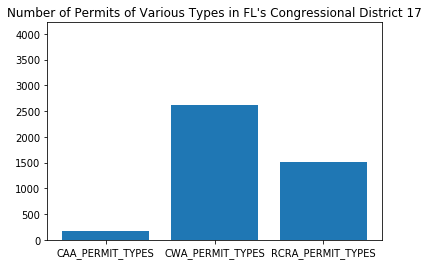

In [8]:
permit_cols = ["CAA_PERMIT_TYPES","CWA_PERMIT_TYPES","RCRA_PERMIT_TYPES"]

# Get a DataFrame with just the columns relating to permit type
permits = my_echo[permit_cols]
# Count how many non-null values are in each column
counted_permit_types = permits.count()

# Print how many values are present for each column (permitting law)
print(counted_permit_types)

# Graph the number of permits by which law they correspond to
plt.bar(counted_permit_types.keys(), counted_permit_types)
plt.ylim(top = num_facilities) # so the top of the graph is the total # of facilities in the region
plt.title("Number of Permits of Various Types in %s's Congressional District %s" %(my_state, my_cd))

To learn more about the several types of permits offered under the Clean Air Act (operating, New Source Review, and others), see EPA’s explanation [here](https://www.epa.gov/caa-permitting).  To learn about the major permitting system under the Clean Water Act, the National Pollutant Discharge Elimination System (NPDES), see EPA’s explanation [here](https://www.epa.gov/npdes).  For more about the EPA’s permitting program for handlers of hazardous waste, click [here](https://www.epa.gov/hwpermitting).

In its air and water programs, EPA draws a line between “major” polluters, which require permits, and “minor” polluters, few of which do.  [Air polluting facilities, for instance](https://www.epa.gov/title-v-operating-permits/who-has-obtain-title-v-permit), are classified as “major,” and must apply for operating permits, if they actually or potentially emit at least 100 tons of a general air pollutant in a year, or 10 tons of a single “hazardous” air pollutant or 25 of a combination of hazardous chemicals per year.  Most “non-major” air polluters, releasing less than those amounts, aren’t required to have permits unless classified as an especially dangerous industry, like smelting or chemical production.

CAA_PERMIT_TYPES
{'Synthetic Minor Emissions': 25, 'Minor Emissions': 96, 'Major Emissions': 34, 'Emissions classification unknown': 18, 'Emissions classification unknown, Minor Emissions': 2}


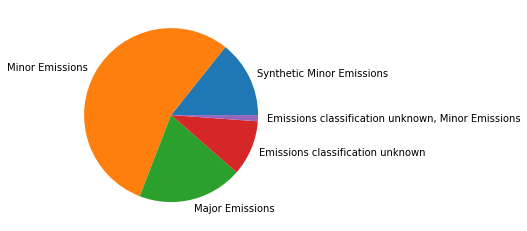

CWA_PERMIT_TYPES
{'Minor': 2601, 'Major': 15, 'Major, Minor': 12}


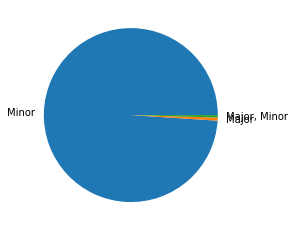

RCRA_PERMIT_TYPES
{'VSQG': 832, 'Other': 546, 'SQG': 98, 'Other, VSQG': 11, 'LQG': 8, 'LQG, TSDF': 1, 'SQG, VSQG': 4, 'LQG, VSQG': 1, 'LQG, Operating TSDF, TSDF, Transporter': 1, 'SQG, Transporter': 1, 'LQG, SQG': 1, 'SQG, TSDF': 1, 'Transporter, VSQG': 1}


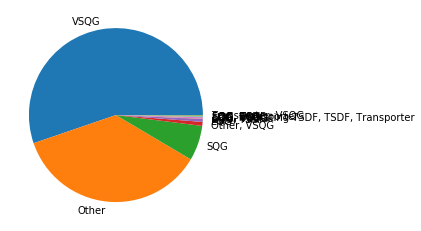

In [9]:
# Drilling down into what types of permits have been issued

# Define a function for counting permit types
def count_permits(permit_law):
    # Find all the possible permit types
    permit_types_with_nan = my_echo[permit_law].unique().tolist()
    # Remove null value as a permit type
    permit_types = [i for i in permit_types_with_nan if str(i) != "nan"] # note that nan values fail to be counted even when left in
    # Define a dictionary to save counted permits
    permits_issued = {}
    # For each permit type...
    for permit_type in permit_types:
        # Count those unique values and save them corresponding to their permit type
        permits_issued[permit_type] = my_echo[my_echo[permit_law] == permit_type].shape[0]
    # Return a tuple naming the law the permit is issued under and a dictionary counting its issued permits
    return (permits_issued)

# For each permit type
for permit_law in permit_cols:
    counted_permits = count_permits(permit_law)
    
    # Print the raw data
    print(permit_law)
    print(counted_permits)
    
    # Plot a pie chart breaking down type of permit in each category
    plt.pie(counted_permits.values(), labels = list(counted_permits.keys()))
    plt.show()


See above for the explanation of “major” and “non-major” air permits; similar distinctions also guide permitting in the [water (CWA)](https://www.epa.gov/npdes-permits/guidance-majorminor-designation-npdes-facilities-region-10) and [hazardous waste (RCRA, CERCLA)](https://www.epa.gov/hwgenerators/categories-hazardous-waste-generators) programs. LQG refers to [“Large Quantity Generators” of hazardous wastes](https://www.epa.gov/hwgenerators/fact-sheet-requirements-large-quantity-generators-hazardous-waste), generating 1,000 kilograms per month or more of hazardous waste or more than one kilogram per month of acutely hazardous waste; SQG to “Small Quantity Generators,” generating less than that, as well as VSQGs or  “very small quantities generators,”– yielding 100 kilograms or less per month of hazardous waste or one kilogram or less per month of acutely hazardous waste.

## Are there facilities in my region not in compliance with their permits in the last three years?

ECHO registers compliance —that a facility’s emissions are within the limits allowed by its permit(s) — by quarter. Those shown to be exceeding their permitted emissions, either through inspections, evaluations, or monitoring data of various kinds, are considered noncompliant, and in violation.  It is worth noting that emissions averaged over a quarter of a year can fail to reflect the level of danger posed by a single and sudden but burst, such as from a massive spill or fire.

Text(0.5, 1.0, "142 of 4221 Total Facilities Noncompliant in FL's Congressional District 17 in the last 12 qtrs")

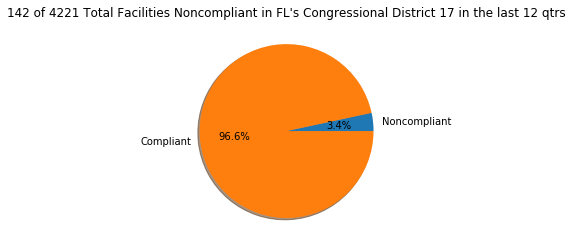

In [10]:
# How many facilities have been out of compliance in the last 12 quarters?

noncompliant = my_echo[my_echo["FAC_QTRS_WITH_NC"] > 0].sort_values(by="FAC_QTRS_WITH_NC", ascending=False)
num_noncompliant = noncompliant.shape[0]
plt.pie([num_noncompliant, num_facilities - num_noncompliant], labels=["Noncompliant", "Compliant"], autopct='%1.1f%%', shadow=True)

plt.title("%s of %s Total Facilities Noncompliant in %s's Congressional District %s in the last 12 qtrs" %(num_noncompliant, num_facilities, my_state, my_cd))

### Where are these noncompliant facilities?

In [18]:
map_of_noncompliant_facilities = mapper(noncompliant)
map_of_noncompliant_facilities

### Which facilities are out of compliance?

In [12]:
# Which facilities aren't in compliance?

print("Facilities in Congressional District %s noncompliant in the last 12 quarters:" %my_cd)
cols_for_print = ["FAC_NAME", "FAC_QTRS_WITH_NC"]
print(noncompliant[cols_for_print])

Facilities in Congressional District 17 noncompliant in the last 12 quarters:
                                       FAC_NAME  FAC_QTRS_WITH_NC
1011404        AVON PARK CORRECTIONAL INSTITUTE              12.0
2223743  LOOMIS EXECUTIVE JET REFINISHING, INC.              12.0
307534               AUTO RESTORATION DEPOT INC              12.0
169190                     ATLAND RECYCLING INC              12.0
854145          DESOTO CORRECTIONAL INSTITUTION              11.0
...                                         ...               ...
1426372                       BRIGHTON DAIRY #1               1.0
1438121                        WHISPERING RIDGE               1.0
1471164                          SOUTHSHORE BAY               1.0
584617               JOLLY GARDNER PRODUCTS INC               1.0
2229946                C & C FLEET SERVICES LLC               1.0

[142 rows x 2 columns]


In [13]:
# More details on noncompliant facilities
print("10 Most Noncompliant Facilities in %s's Congressional District %s in the last 12 quarters:" %(my_state, my_cd))

additional_cols = ["FAC_3YR_COMPLIANCE_HISTORY", "FAC_INSPECTION_COUNT"]
cols_for_print.extend(additional_cols)
cols_for_print.extend(permit_cols)


print(noncompliant[cols_for_print].head(10))

10 Most Noncompliant Facilities in FL's Congressional District 17 in the last 12 quarters:
                                       FAC_NAME  FAC_QTRS_WITH_NC  \
1011404        AVON PARK CORRECTIONAL INSTITUTE              12.0   
2223743  LOOMIS EXECUTIVE JET REFINISHING, INC.              12.0   
307534               AUTO RESTORATION DEPOT INC              12.0   
169190                     ATLAND RECYCLING INC              12.0   
854145          DESOTO CORRECTIONAL INSTITUTION              11.0   
1402376                 WHISPER CREEK R.V. PARK              11.0   
1385232                     EAGLE LAKE, CITY OF              11.0   
475074                       BUTTONWOOD BAY MHP              11.0   
708011                 WHIDDEN MOBILE HOME PARK              11.0   
1307039                     LAKE BONNET VILLAGE              11.0   

        FAC_3YR_COMPLIANCE_HISTORY  FAC_INSPECTION_COUNT CAA_PERMIT_TYPES  \
1011404               SSSSSSVVVVVV                   3.0              Na

# Greenhouse Gases

Text(0.5, 1.0, "Of the 4221 facilities reporting to ECHO in FL's Congressional District 17, 13 report greenhouse gas emissions.")

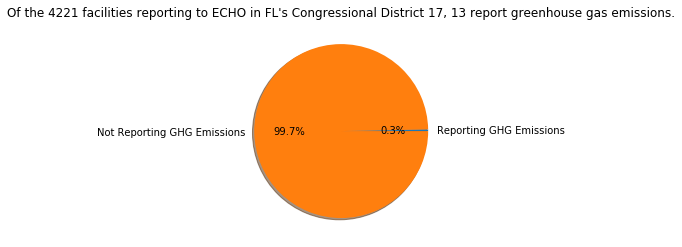

In [14]:
my_ghg = my_echo[my_echo["GHG_CO2_RELEASES"].notna()].sort_values(by="GHG_CO2_RELEASES", ascending=False)

plt.pie([my_ghg.shape[0], num_facilities - my_ghg.shape[0]], labels=["Reporting GHG Emissions", "Not Reporting GHG Emissions"], autopct='%1.1f%%', shadow=True)

plt.title("Of the %s facilities reporting to ECHO in %s's Congressional District %s, %s report greenhouse gas emissions." %(num_facilities, my_state, my_cd, my_ghg.shape[0]))


Stats on CO2 releases for the facilities that are reporting: Total Facility Emissions in metric tons CO2e (excluding Biogenic CO2) from the most recent reporting year.

In [15]:
print("'Count' is the number of facilities reporting; all of the other numbers are statistics on the greenhouse gas emissions of all of the facilities in %s's Congressional District %s, measured in metric tons of CO2e." %(my_state, my_cd))
my_ghg["GHG_CO2_RELEASES"].describe()

'Count' is the number of facilities reporting; all of the other numbers are statistics on the greenhouse gas emissions of all of the facilities in FL's Congressional District 17, measured in metric tons of CO2e.


count    1.300000e+01
mean     1.181962e+06
std      1.674570e+06
min      3.672600e+04
25%      8.482600e+04
50%      3.290330e+05
75%      1.490801e+06
max      5.031203e+06
Name: GHG_CO2_RELEASES, dtype: float64

**Bonus:** Try entering the mean (from above) into https://www.epa.gov/energy/greenhouse-gas-equivalencies-calculator and see what an average facility in your congressional district emits into the atmosphere compared to you.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

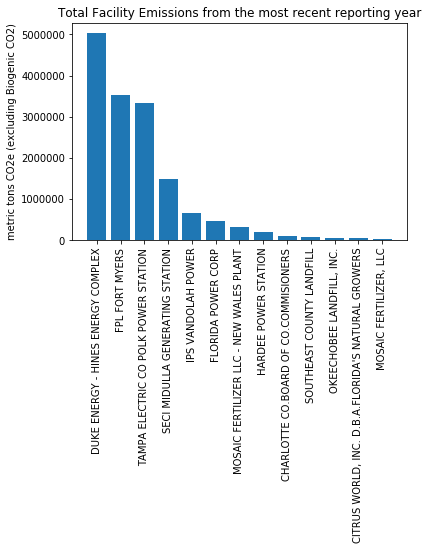

In [16]:
plt.bar(my_ghg["FAC_NAME"], my_ghg["GHG_CO2_RELEASES"])
plt.title("Total Facility Emissions from the most recent reporting year")
plt.ylabel("metric tons CO2e (excluding Biogenic CO2)")
plt.xticks(rotation = 90)

# Next questions

What other questions would you like to see added? Here are some I have:
* What are the top 3 noncompliant facilities in the congressional district and what are they violating?
* Which types of noncompliance are we experiencing here?
* Beyond "significant" – how much over their permits are they?

Please suggest questions (click "New Issue") on the [Github page for this project](https://github.com/edgi-govdata-archiving/ECHO-by-Zip-Code/issues). Maybe we can answer them together!
